# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
%matplotlib inline

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

#Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


In [3]:
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

In [4]:
df= pd.DataFrame({'Latitude':lats, 'Longtitude':lngs}).astype(float)
df


,Latitude,Longtitude
0,0.639384,115.571215
1,73.744496,157.380768
2,-38.607242,14.955532
3,17.267136,-40.928138
4,28.249380,171.453594
5,-38.215475,-157.730604
6,4.700857,89.928887
7,-42.166788,-158.553183
8,54.434449,7.795025
9,-27.311417,128.281061


In [5]:
df["City"]=''

## Generate Cities List

In [6]:
for index, row in df.iterrows():
    df.iloc[index, 2]= citipy.nearest_city(row['Latitude'], row['Longtitude']).city_name
    
df.drop_duplicates('City', inplace=True)

df.reset_index(inplace=True, drop=True)

df

,Latitude,Longtitude,City
0,0.639384,115.571215,loa janan
1,73.744496,157.380768,cherskiy
2,-38.607242,14.955532,cape town
3,17.267136,-40.928138,ponta do sol
4,28.249380,171.453594,butaritari
5,-38.215475,-157.730604,mataura
6,4.700857,89.928887,banda aceh
7,54.434449,7.795025,westerland
8,-27.311417,128.281061,yulara
9,-41.861105,-118.927451,rikitea


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
base_url='http://api.openweathermap.org/data/2.5/weather?'

parameters={
    'units':'metric',
    'APPID': api_key}

df["Date"]=""
df['Temperature']=""
df['Humidity']=""
df['Wind Speed']=""
df["Clouds"]=""


df


for index, row in df.iterrows():
    Target_city= row['City']
    parameters['q']= Target_city
    response = requests.get(base_url, params=parameters).json()
    
    try:
        print(f'processing request from index:{index} | city: {Target_city}')
    
        df.loc[index, 'Date'] = response['dt']
        df.loc[index, 'Temperature'] = (response['main']['temp'])
        df.loc[index, 'Humidity']= response['main']['humidity']
        df.loc[index, 'Wind Speed']= response['wind']['speed']
        df.loc[index, 'Clouds']= response['clouds']['all']
        

    except (KeyError, IndexError):
        print(f'{Target_city} is not found...................')
        
        df.loc[index, 'Date'] = np.nan
        df.loc[index, 'Temperature'] = np.nan
        df.loc[index, 'Humidity']= np.nan
        df.loc[index, 'Wind Speed']= np.nan
        df.loc[index, 'Clouds']= np.nan
        


processing request from index:0 | city: loa janan
processing request from index:1 | city: cherskiy
processing request from index:2 | city: cape town
processing request from index:3 | city: ponta do sol
processing request from index:4 | city: butaritari
processing request from index:5 | city: mataura
processing request from index:6 | city: banda aceh
processing request from index:7 | city: westerland
processing request from index:8 | city: yulara
processing request from index:9 | city: rikitea
processing request from index:10 | city: los llanos de aridane
processing request from index:11 | city: umzimvubu
umzimvubu is not found...................
processing request from index:12 | city: rocha
processing request from index:13 | city: punta arenas
processing request from index:14 | city: new norfolk
processing request from index:15 | city: lucea
processing request from index:16 | city: chernyshevskiy
processing request from index:17 | city: dikson
processing request from index:18 | city: 

processing request from index:150 | city: guajara-mirim
guajara-mirim is not found...................
processing request from index:151 | city: flinders
processing request from index:152 | city: wewak
processing request from index:153 | city: haines junction
processing request from index:154 | city: achacachi
processing request from index:155 | city: aracati
processing request from index:156 | city: olafsvik
olafsvik is not found...................
processing request from index:157 | city: qasigiannguit
processing request from index:158 | city: pankrushikha
processing request from index:159 | city: albany
processing request from index:160 | city: mata grande
processing request from index:161 | city: vestmanna
processing request from index:162 | city: isangel
processing request from index:163 | city: narsaq
processing request from index:164 | city: mandera
processing request from index:165 | city: nizhneyansk
nizhneyansk is not found...................
processing request from index:166 

processing request from index:302 | city: aitape
processing request from index:303 | city: alcaniz
processing request from index:304 | city: bathsheba
processing request from index:305 | city: tulun
processing request from index:306 | city: jalu
processing request from index:307 | city: pachelma
processing request from index:308 | city: lagoa
processing request from index:309 | city: chokurdakh
processing request from index:310 | city: chimbote
processing request from index:311 | city: afua
processing request from index:312 | city: zhumadian
processing request from index:313 | city: mocuba
processing request from index:314 | city: ust-kamchatsk
ust-kamchatsk is not found...................
processing request from index:315 | city: prince rupert
processing request from index:316 | city: waipawa
processing request from index:317 | city: bandarbeyla
processing request from index:318 | city: saint-pierre
processing request from index:319 | city: matara
processing request from index:320 | c

processing request from index:452 | city: kandi
processing request from index:453 | city: laureles
processing request from index:454 | city: san patricio
processing request from index:455 | city: almaznyy
processing request from index:456 | city: houma
processing request from index:457 | city: blagoyevo
processing request from index:458 | city: marzuq
processing request from index:459 | city: chase
processing request from index:460 | city: takoradi
processing request from index:461 | city: zlynka
processing request from index:462 | city: hetauda
processing request from index:463 | city: changli
processing request from index:464 | city: porto velho
processing request from index:465 | city: ketchenery
ketchenery is not found...................
processing request from index:466 | city: mrirt
mrirt is not found...................
processing request from index:467 | city: ayia galini
processing request from index:468 | city: asau
asau is not found...................
processing request from 

processing request from index:604 | city: casma
processing request from index:605 | city: pierre
processing request from index:606 | city: mocajuba
processing request from index:607 | city: ankara
processing request from index:608 | city: sarkand
processing request from index:609 | city: doha
processing request from index:610 | city: aflu
aflu is not found...................
processing request from index:611 | city: chapais
processing request from index:612 | city: sayyan
processing request from index:613 | city: urucurituba
urucurituba is not found...................
processing request from index:614 | city: callaway
processing request from index:615 | city: mehran
processing request from index:616 | city: saint anthony
processing request from index:617 | city: nanakuli
processing request from index:618 | city: kavaratti
processing request from index:619 | city: fort nelson
processing request from index:620 | city: vanimo
processing request from index:621 | city: vaxjo
vaxjo is not fo

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
df.count()

Latitude       633
Longtitude     633
City           633
Date           574
Temperature    574
Humidity       574
Wind Speed     574
Clouds         574
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
df.reset_index(inplace=True, drop=True)

In [11]:
df['Date (UTC)'] = pd.to_datetime(df['Date'],unit='s', utc=False)
df

,Latitude,Longtitude,City,Date,Temperature,Humidity,Wind Speed,Clouds,Date (UTC)
0,0.639384,115.571215,loa janan,1544316482,25.64,92,1.32,12,2018-12-09 00:48:02
1,73.744496,157.380768,cherskiy,1544316482,-31.54,75,1.42,48,2018-12-09 00:48:02
2,-38.607242,14.955532,cape town,1544313600,16,72,3.1,0,2018-12-09 00:00:00
3,17.267136,-40.928138,ponta do sol,1544316483,18.97,66,5.42,0,2018-12-09 00:48:03
4,28.249380,171.453594,butaritari,1544316333,29.77,100,2.32,0,2018-12-09 00:45:33
5,-38.215475,-157.730604,mataura,1544316483,18.47,89,6.42,92,2018-12-09 00:48:03
6,4.700857,89.928887,banda aceh,1544316483,23.07,100,1.02,32,2018-12-09 00:48:03
7,54.434449,7.795025,westerland,1544315340,9.8,81,13.9,90,2018-12-09 00:29:00
8,-27.311417,128.281061,yulara,1544313600,36,20,3.6,32,2018-12-09 00:00:00
9,-41.861105,-118.927451,rikitea,1544316484,25.89,98,6.62,88,2018-12-09 00:48:04


In [12]:
df.to_csv('cities.csv')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

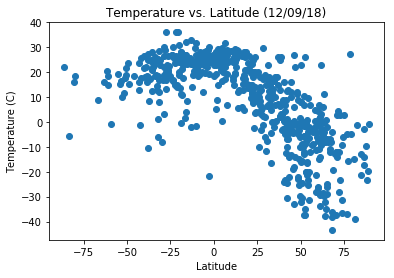

In [14]:
y_T=df['Temperature']
x_T=df['Latitude']
T_plot=plt.scatter(x_T, y_T)
plt.xlabel('Latitude')
plt.ylabel('Temperature (C)')
plt.title('Temperature vs. Latitude (12/09/18)')
plt.savefig('Temperature_vs_Latitude')
plt.show()

#### Latitude vs. Humidity Plot

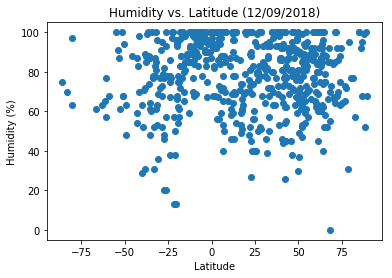

In [16]:
x_humidity=df['Latitude']
y_humidity=df['Humidity']
H_plot=plt.scatter(x_humidity, y_humidity)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Humidity vs. Latitude (12/09/2018)')
plt.savefig('Humidity_vs_latitude')
plt.show()

#### Latitude vs. Cloudiness Plot

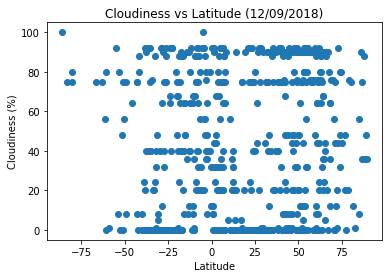

In [17]:
x_clouds=df['Latitude']
y_clouds=df['Clouds']
plt.scatter(x_clouds, y_clouds)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Cloudiness vs Latitude (12/09/2018)')
plt.savefig('Cloudiness_vs_latitude')
plt.show()

#### Latitude vs. Wind Speed Plot

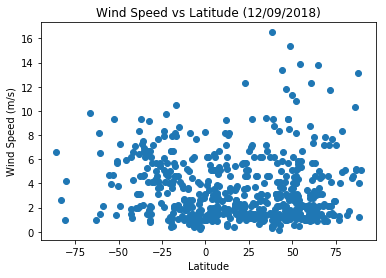

In [18]:
x_wind=df['Latitude']
y_wind=df['Wind Speed']
plt.scatter(x_wind, y_wind)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('Wind Speed vs Latitude (12/09/2018)')
plt.savefig('Wind_speed_vs_latitude')
plt.show()
